In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
dnds_f = 'data/results/toga/orthodiver_output/divergence_per_transcript.tsv'
transcript_bed_f = 'data/results/toga/orthodiver_output/braker.agat.simpler.TOGA.bed'

In [210]:
dnds_df = pd.read_csv(dnds_f, sep='\t')
bed_df = pd.read_csv(transcript_bed_f, sep='\t', names = ['chrom', 'start','end','name','score','strand','ts','te','irgb','bc','bsi','bst'])

In [211]:
dnds_df['gene'] = dnds_df['transcript'].str.split('_', expand=True)[0]

loc_df = bed_df[['chrom', 'name']]
loc_df.columns=['chrom','transcript']
loc_df['gene'] = loc_df['transcript'].str.split('.', expand=True)[0]
loc_df = loc_df[loc_df['gene'].isin(dnds_df['gene'])]

dnds_df = dnds_df.merge(loc_df[['chrom', 'gene']], how = 'outer', on = 'gene')
dnds_df = dnds_df.drop_duplicates().reset_index()

/var/folders/f7/w9mgqp1n79s37vy6cvsfp35m0000gt/T/ipykernel_40976/621036393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df['gene'] = loc_df['transcript'].str.split('.', expand=True)[0]


In [212]:
dnds_df['linkage'] = np.where((dnds_df['chrom'] == 'OX359249' ) | (dnds_df['chrom'] == 'OX359250'),
                            'X', 'autosome')
dnds_df.replace([np.inf, -np.inf], np.nan, inplace=True)
dnds_df.dropna(inplace=True)

In [213]:
dnds_og = dnds_df.copy(deep=True)

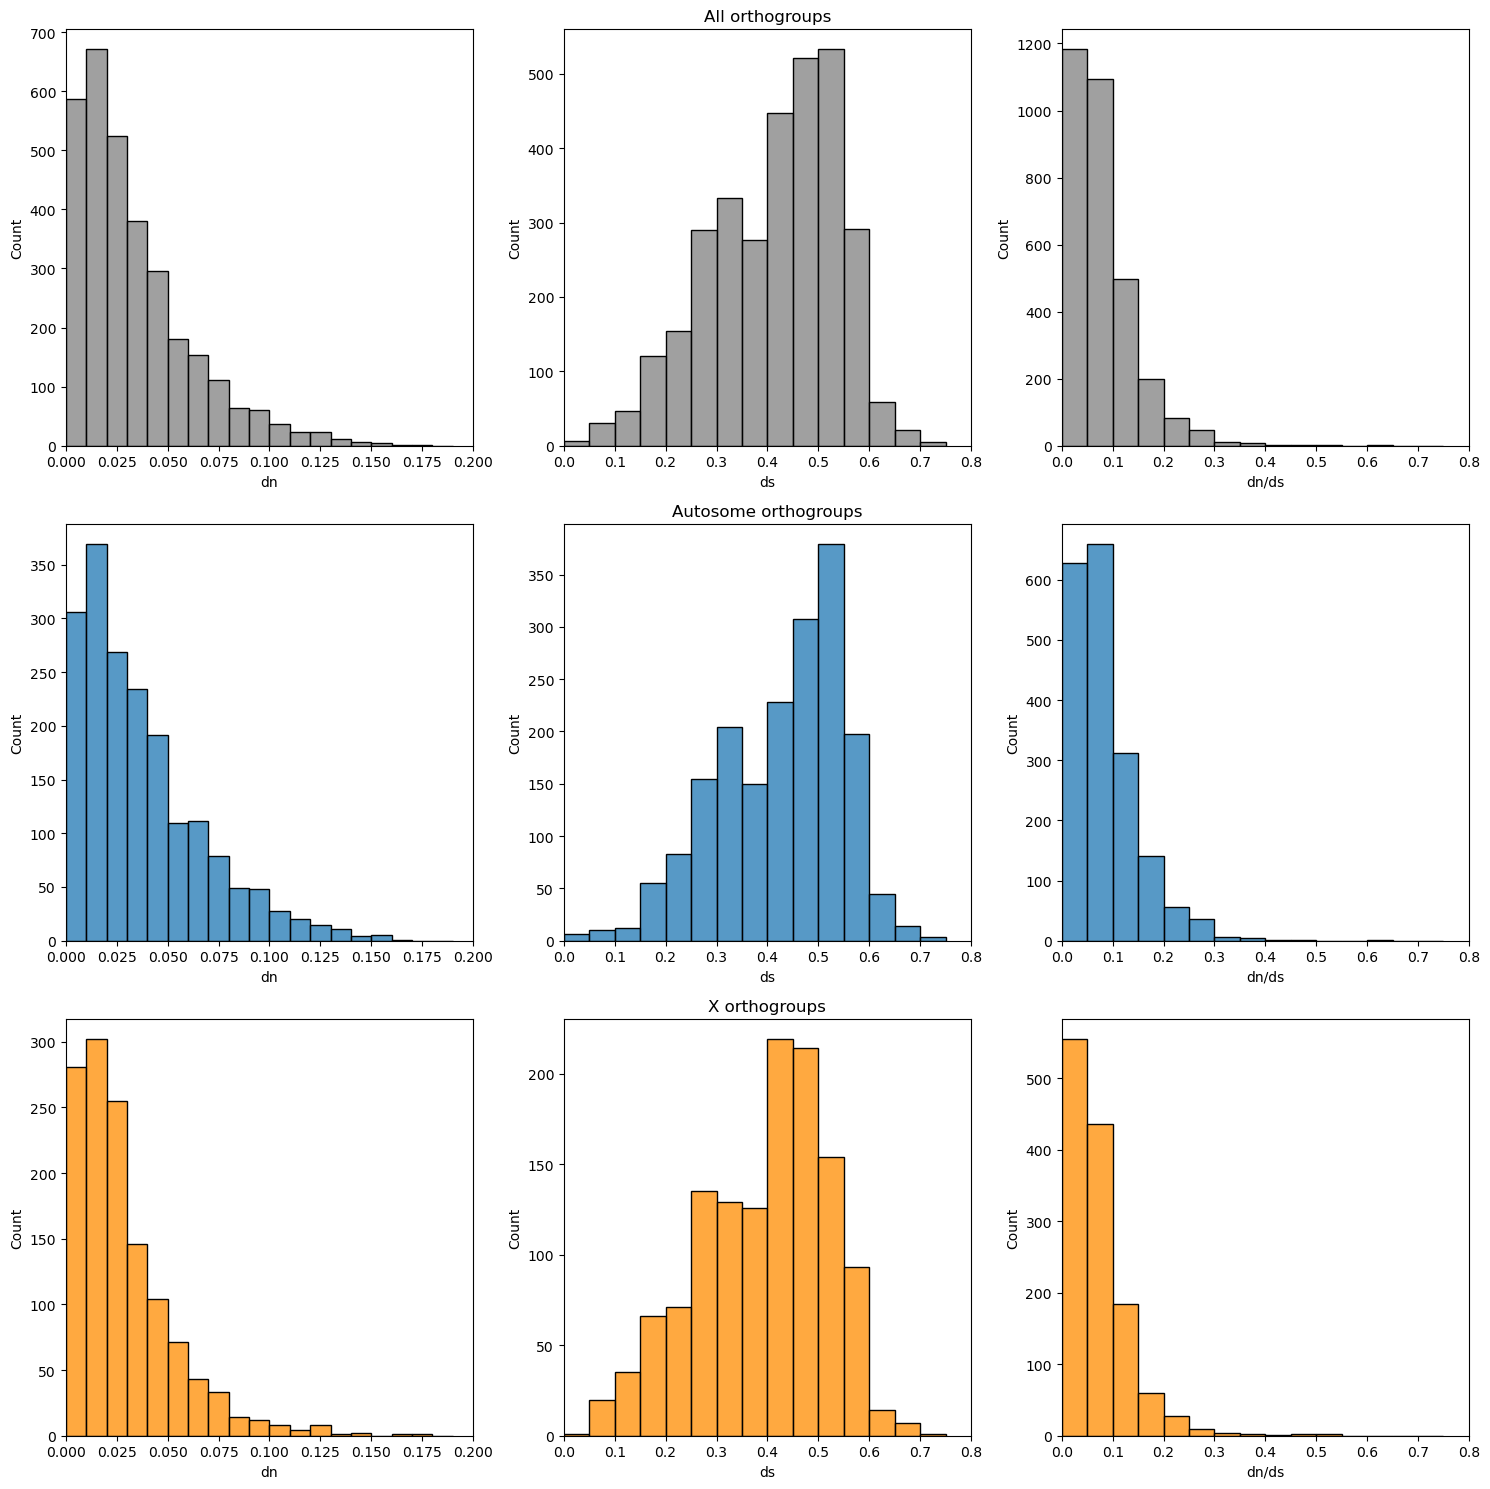

In [214]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = [15,15])

dn_bins = np.arange(0, 0.2, 0.01)
ds_bins = np.arange(0, 0.8, 0.05)
dnds_bins = np.arange(0, 0.8, 0.05)

aut_df = dnds_df[dnds_df['linkage']=='autosome']
x_df = dnds_df[dnds_df['linkage']=='X']

dn_all = axs[0,0]
ds_all = axs[0,1]
dnds_all = axs[0,2]
dn_aut = axs[1,0]
ds_aut = axs[1,1]
dnds_aut = axs[1,2]
dn_x = axs[2,0]
ds_x = axs[2,1]
dnds_x = axs[2,2]

### ALL
sns.histplot(dnds_df['0_dxy'],
            ax = dn_all,
            bins = dn_bins,
            color = 'grey')
dn_all.set_xlabel('dn')
dn_all.set_xlim([0,0.2])

sns.histplot(dnds_df['4_dxy'],
            ax = ds_all,
            bins = ds_bins,
            color = 'grey')
ds_all.set_xlabel('ds')
ds_all.set_title('All orthogroups', loc='center')
ds_all.set_xlim([0,0.8])

sns.histplot(dnds_df['0/4_dxy'],
            ax = dnds_all,
            bins = dnds_bins,
            color = 'grey')
dnds_all.set_xlabel('dn/ds')
dnds_all.set_xlim([0,0.8])

### AUTOSOME

sns.histplot(aut_df['0_dxy'],
            ax = dn_aut,
            bins = dn_bins)
dn_aut.set_xlabel('dn')
dn_aut.set_xlim([0,0.2])

sns.histplot(aut_df['4_dxy'],
            ax = ds_aut,
            bins = ds_bins)
ds_aut.set_xlabel('ds')
ds_aut.set_title('Autosome orthogroups', loc='center')
ds_aut.set_xlim([0,0.8])

sns.histplot(aut_df['0/4_dxy'],
            ax = dnds_aut,
            bins = dnds_bins)
dnds_aut.set_xlabel('dn/ds')
dnds_aut.set_xlim([0,0.8])

### X

sns.histplot(x_df['0_dxy'],
            ax = dn_x,
            bins = dn_bins,
            color = 'darkorange')
dn_x.set_xlabel('dn')
dn_x.set_xlim([0,0.2])

sns.histplot(x_df['4_dxy'],
            ax = ds_x,
            bins = ds_bins,
            color = 'darkorange')
ds_x.set_xlabel('ds')
ds_x.set_title('X orthogroups', loc='center')
ds_x.set_xlim([0,0.8])

sns.histplot(x_df['0/4_dxy'],
            ax = dnds_x,
            bins = dnds_bins,
            color = 'darkorange')

dnds_x.set_xlabel('dn/ds')
dnds_x.set_xlim([0,0.8])

plt.tight_layout()
plt.savefig('dnds_hists.png', dpi=300)

In [215]:
dnds_df[dnds_df['linkage']=='']

,index,transcript,0_dxy,4_dxy,0/4_dxy,gene,chrom,linkage


In [216]:
aut_df['0/4_dxy'].mean()

0.08802227143283807

In [217]:
x_df['0/4_dxy'].mean()

0.07383574880003485

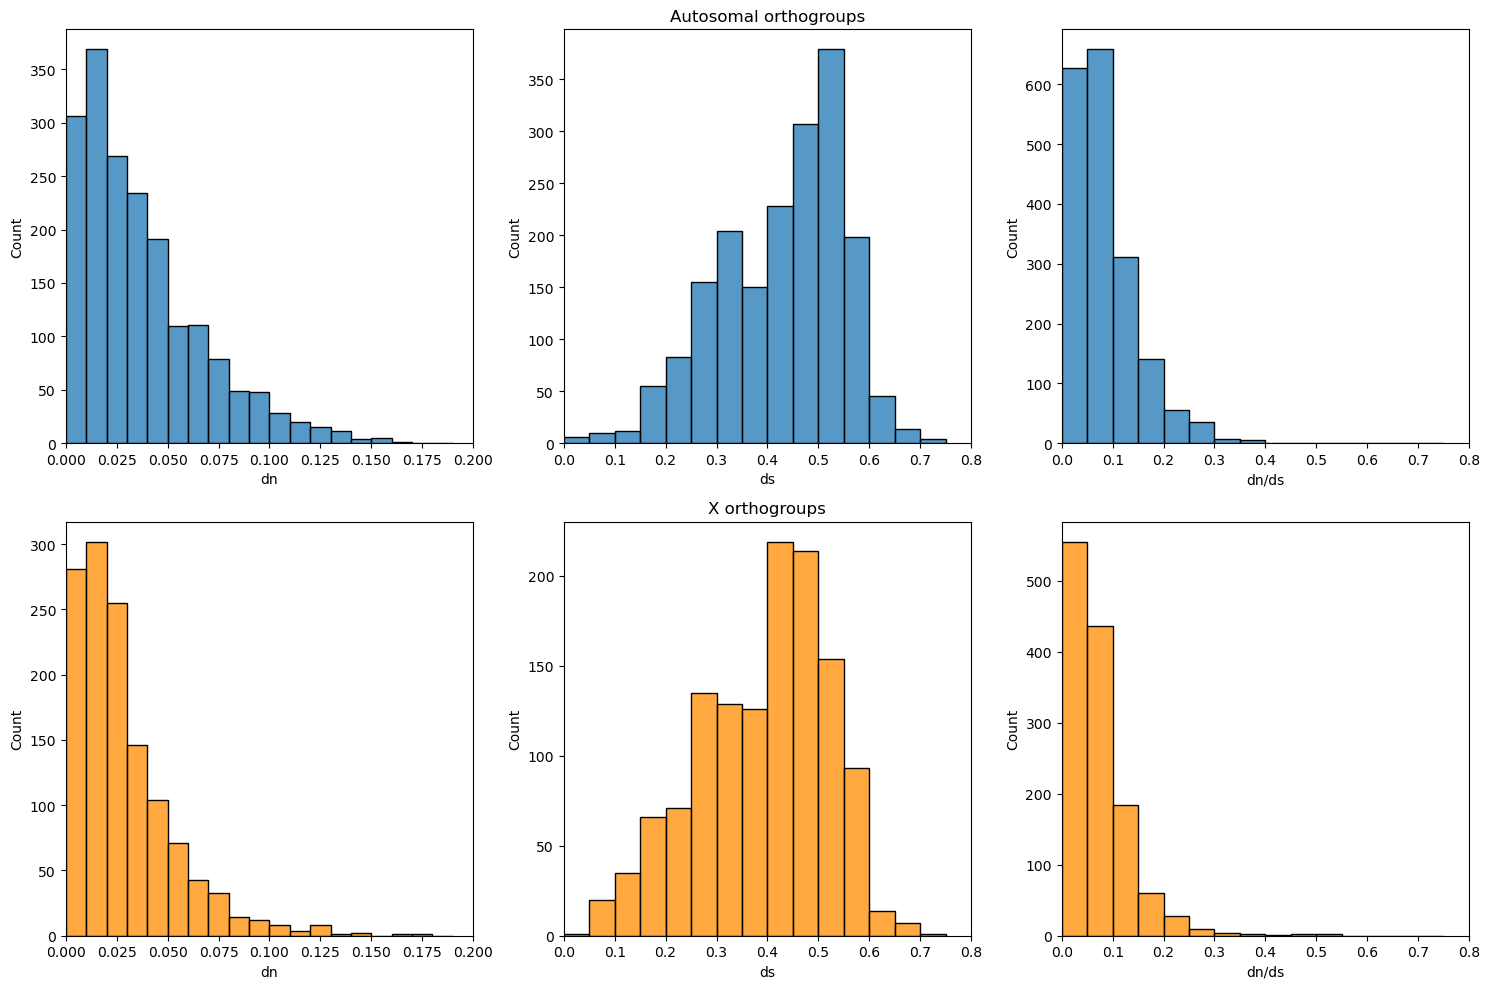

In [218]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = [15,10])

dn_bins = np.arange(0, 0.2, 0.01)
ds_bins = np.arange(0, 0.8, 0.05)
dnds_bins = np.arange(0, 0.8, 0.05)

aut_df = dnds_df[dnds_df['linkage']=='autosome']
x_df = dnds_df[dnds_df['linkage']=='X']

dn_aut = axs[0,0]
ds_aut = axs[0,1]
dnds_aut = axs[0,2]
dn_x = axs[1,0]
ds_x = axs[1,1]
dnds_x = axs[1,2]

### AUTOSOME

sns.histplot(aut_df['0_dxy'],
            ax = dn_aut,
            bins = dn_bins)
dn_aut.set_xlabel('dn')
dn_aut.set_xlim([0,0.2])

sns.histplot(aut_df['4_dxy'],
            ax = ds_aut,
            bins = ds_bins)
ds_aut.set_xlabel('ds')
ds_aut.set_title('Autosomal orthogroups', loc='center')
ds_aut.set_xlim([0,0.8])

sns.histplot(aut_df['0/4_dxy'],
            ax = dnds_aut,
            bins = dnds_bins)
dnds_aut.set_xlabel('dn/ds')
dnds_aut.set_xlim([0,0.8])

### X

sns.histplot(x_df['0_dxy'],
            ax = dn_x,
            bins = dn_bins,
            color = 'darkorange')
dn_x.set_xlabel('dn')
dn_x.set_xlim([0,0.2])

sns.histplot(x_df['4_dxy'],
            ax = ds_x,
            bins = ds_bins,
            color = 'darkorange')
ds_x.set_xlabel('ds')
ds_x.set_title('X orthogroups', loc='center')
ds_x.set_xlim([0,0.8])

sns.histplot(x_df['0/4_dxy'],
            ax = dnds_x,
            bins = dnds_bins,
            color = 'darkorange')

dnds_x.set_xlabel('dn/ds')
dnds_x.set_xlim([0,0.8])

plt.tight_layout()
plt.savefig('dnds_hists.svg', format = 'svg')

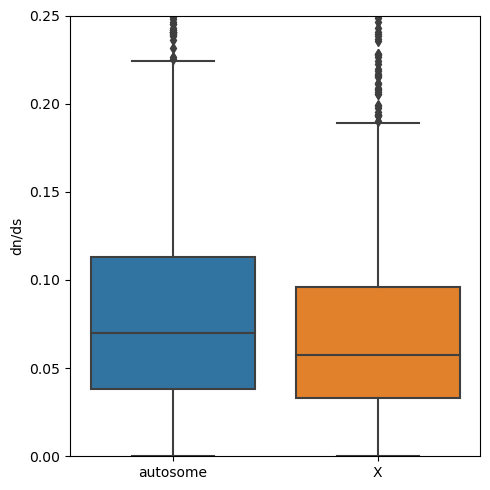

In [219]:
fig, axs = plt.subplots(figsize = [5,5])

sns.boxplot(data = dnds_df,
            x = 'linkage',
            y = '0/4_dxy')

axs.set_ylabel('dn/ds')
axs.set_xlabel('')
axs.set_ylim([0, 0.25]) 
plt.tight_layout()

plt.savefig('dnds_boxplot.png', dpi=300)

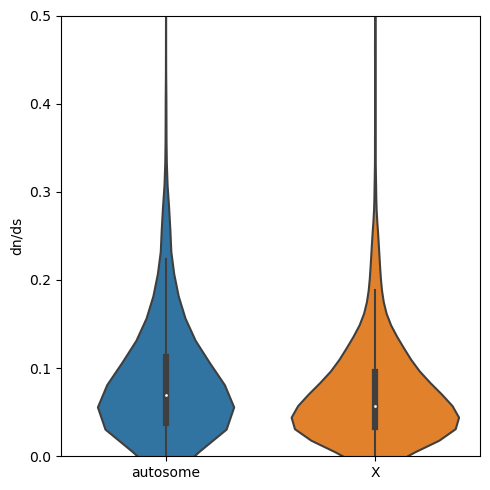

In [220]:
fig, axs = plt.subplots(figsize = [5,5])

sns.violinplot(data = dnds_df,
            x = 'linkage',
            y = '0/4_dxy')

axs.set_ylabel('dn/ds')
axs.set_xlabel('')
axs.set_ylim([0, 0.5]) 
plt.tight_layout()

plt.savefig('dnds_violinplot.png', dpi=300)

In [221]:
print(1-dnds_df['0/4_dxy'].mean())
print(1-dnds_df[dnds_df['linkage']=='autosome']['0/4_dxy'].mean())
print(1-dnds_df[dnds_df['linkage']=='X']['0/4_dxy'].mean())

0.9177934340519516
0.911977728567162
0.9261642511999651


In [222]:
dnds_df[dnds_df['linkage']=='autosome']['0/4_dxy'].mean()/dnds_df[dnds_df['linkage']=='X']['0/4_dxy'].mean()

1.192136232967905

In [223]:
def a_to_x_sub_ratio(h):
    return (4*h)/(1+(2*h))

a_to_x_sub_ratio(0.738)

1.1922455573505655

In [224]:
def a_to_x_sub_ratio_pge(h):
    return (3*h)/(1+(2*h))

a_to_x_sub_ratio_pge(2)

# dont think this makes sense?

1.2

In [225]:
SBG_df = pd.read_csv('data/results/deseq2/allacma_fusca/v_2/allacma_fusca.gene_bias.chromosomes.tsv', 
                        sep = '\t')
SBG_df = SBG_df[SBG_df['Geneid'].isin(dnds_df['gene'])][['Geneid','bias']]
SBG_df.columns = ['gene','bias']
dnds_df = dnds_df.merge(SBG_df, how = 'outer', on = 'gene')
dnds_df = dnds_df.drop_duplicates().dropna()

In [226]:
dnds_df[dnds_df['bias']=='unbiased']['0/4_dxy'].mean()

0.07244349324803766

In [227]:
dnds_df[dnds_df['bias']=='female_biased']['0/4_dxy'].mean()

0.0822869585995847

In [228]:
dnds_df[dnds_df['bias']=='male_biased']['0/4_dxy'].mean()

0.10913406142617828

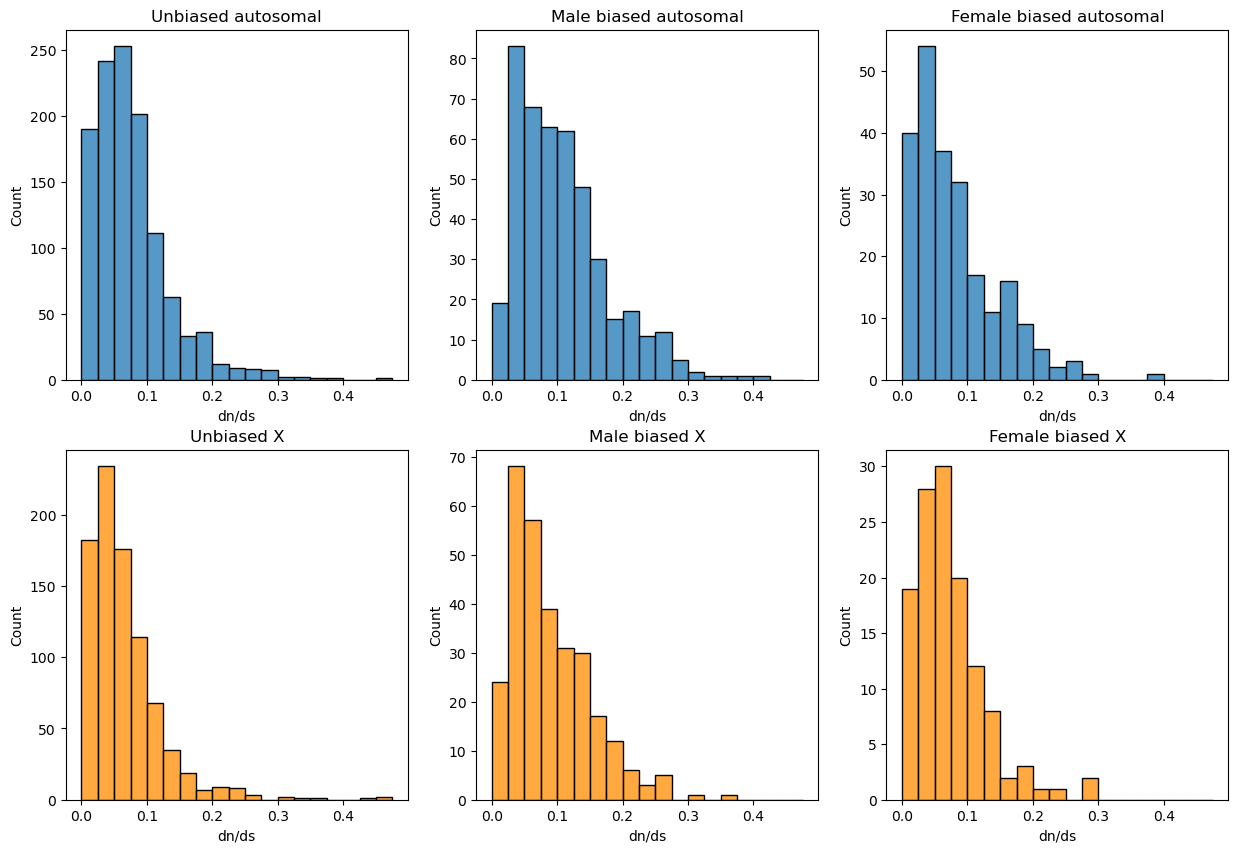

In [229]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = [15,10])

bins = np.arange(0, 0.5, 0.025)

aut_df = dnds_df[dnds_df['linkage']=='autosome']
x_df = dnds_df[dnds_df['linkage']=='X']

unb_a = axs[0,0]
male_a = axs[0,1]
female_a = axs[0,2]
unb_x = axs[1,0]
male_x = axs[1,1]
female_x = axs[1,2]

# UNBIASED

sns.histplot(aut_df[aut_df['bias']=='unbiased']['0/4_dxy'],
            ax = unb_a,
            bins = bins)

sns.histplot(x_df[x_df['bias']=='unbiased']['0/4_dxy'],
            ax = unb_x,
            bins = bins,
            color = 'darkorange')

unb_a.set_title('Unbiased autosomal')
unb_x.set_title('Unbiased X')

# MALE BIASED

sns.histplot(aut_df[aut_df['bias']=='male_biased']['0/4_dxy'],
            ax = male_a,
            bins = bins)

sns.histplot(x_df[x_df['bias']=='male_biased']['0/4_dxy'],
            ax = male_x,
            bins = bins,
            color = 'darkorange')

male_a.set_title('Male biased autosomal')
male_x.set_title('Male biased X')

# FEMALE BIASED

sns.histplot(aut_df[aut_df['bias']=='female_biased']['0/4_dxy'],
            ax = female_a,
            bins = bins)

sns.histplot(x_df[x_df['bias']=='female_biased']['0/4_dxy'],
            ax = female_x,
            bins = bins,
            color = 'darkorange')

female_a.set_title('Female biased autosomal')
female_x.set_title('Female biased X')


for ax_row in axs:
    for ax in ax_row:
        ax.set_xlabel('dn/ds')

plt.savefig('bias_hists.png', dpi=300)

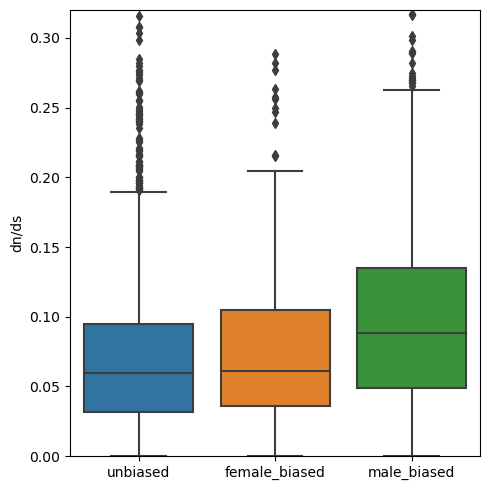

In [230]:
fig, axs = plt.subplots(figsize = [5,5])

sns.boxplot(data = dnds_df,
            x = 'bias',
            #hue = 'linkage',
            y = '0/4_dxy')

axs.set_ylabel('dn/ds')
axs.set_xlabel('')
axs.set_ylim([0, 0.32]) 
plt.tight_layout()
#axs.legend(loc='upper center')

plt.savefig('bias_dnds_boxplot_nolinkage.svg', format = 'svg')

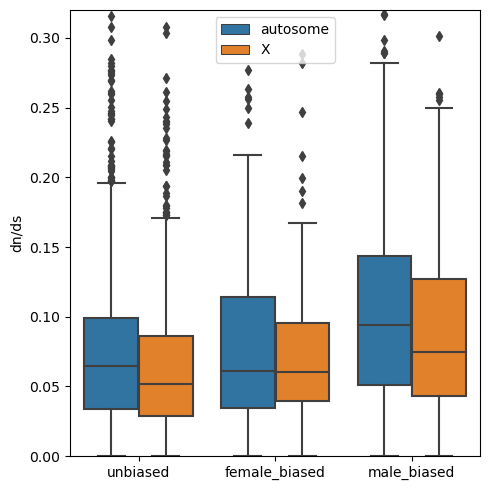

In [231]:
fig, axs = plt.subplots(figsize = [5,5])

sns.boxplot(data = dnds_df,
            x = 'bias',
            hue = 'linkage',
            y = '0/4_dxy')

axs.set_ylabel('dn/ds')
axs.set_xlabel('')
axs.set_ylim([0, 0.32]) 
plt.tight_layout()
axs.legend(loc='upper center')

plt.savefig('bias_dnds_boxplot.png', dpi=300)

## 

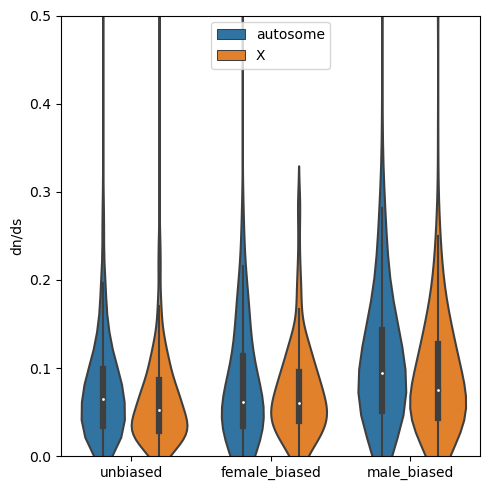

In [232]:
fig, axs = plt.subplots(figsize = [5,5])

sns.violinplot(data = dnds_df,
            x = 'bias',
            hue = 'linkage',
            y = '0/4_dxy')

axs.set_ylabel('dn/ds')
axs.set_xlabel('')
axs.set_ylim([0, 0.5]) 
plt.tight_layout()
axs.legend(loc='upper center')

plt.savefig('bias_dnds_violinplot.png', dpi=300)

In [233]:
dnds_df[(dnds_df['linkage']=='autosome') & (dnds_df['bias']=='male_biased')]['0/4_dxy'].mean()/dnds_df[(dnds_df['linkage']=='X') & (dnds_df['bias']=='male_biased')]['0/4_dxy'].mean()

1.1669134261643384

In [234]:
dnds_df[dnds_df['0/4_dxy']>1/3]
# Evidence for positive selection in some male-biased genes, mcdonald kreitman test is better for getting at this
# Could estimate h in positively selected mutations based on alpha, it is probably not relevant for all mutations
# still need to figure out PGE h expectation

,index,transcript,0_dxy,4_dxy,0/4_dxy,gene,chrom,linkage,bias
55,1131,g22335_t1_14,0.123188,0.285714,0.431159,g22335,OX359250,X,unbiased
563,2859,g11236_t1_9,0.113990,0.285714,0.398964,g11236,OX359247,autosome,male_biased
625,2974,g15330_t1_4,0.155357,0.257778,0.602679,g15330,OX359248,autosome,unbiased
798,3374,g10033_t1_8,0.042735,0.033333,1.282051,g10033,OX359247,autosome,male_biased
1214,4189,g20073_t1_2,0.163636,0.133333,1.227273,g20073,OX359249,X,male_biased
1382,4474,g21456_t1_13,0.037383,0.081633,0.457944,g21456,OX359250,X,unbiased
1567,4742,g20029_t1_2,0.120000,0.222222,0.540000,g20029,OX359249,X,male_biased
1715,4976,g16207_t1_3,0.098214,0.125000,0.785714,g16207,OX359248,autosome,female_biased
2008,5410,g15520_t1_4,0.228814,0.095238,2.402542,g15520,OX359248,autosome,male_biased
2064,5512,g12505_t1_12,0.042146,0.090909,0.463601,g12505,OX359247,autosome,unbiased


In [235]:
dnds_df[dnds_df['linkage']=='autosome']['0_dxy'].mean()/dnds_df[dnds_df['linkage']=='X']['0_dxy'].mean()

1.3099012360787956

In [236]:
dnds_df[(dnds_df['linkage']=='autosome') & (dnds_df['bias']=='male_biased')]['0_dxy'].mean()/dnds_df[(dnds_df['linkage']=='X') & (dnds_df['bias']=='male_biased')]['0_dxy'].mean()

1.211387643097378

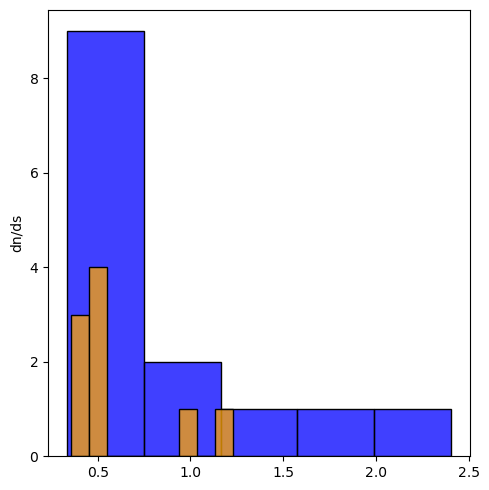

In [237]:
fig, axs = plt.subplots(figsize = [5,5])

sns.histplot(dnds_df[(dnds_df['0/4_dxy']>1/3) & (dnds_df['linkage']=='autosome')]['0/4_dxy'],
            color = 'blue')
sns.histplot(dnds_df[(dnds_df['0/4_dxy']>1/3) & (dnds_df['linkage']=='X')]['0/4_dxy'],
            color = 'orange')

axs.set_ylabel('dn/ds')
axs.set_xlabel('')
#axs.set_ylim([0, 0.25]) 
plt.tight_layout()

In [238]:
!ls

allacma_fusca.longest_isoforms.pi.tsv dnds_exp.svg
alpha_exp.svg                         dnds_hists.png
backup_log                            dnds_hists.svg
bias_dnds_boxplot.png                 dnds_pair.svg
bias_dnds_boxplot_nolinkage.png       dnds_violinplot.png
bias_dnds_boxplot_nolinkage.svg       expected_substitution_rates.ipynb
bias_dnds_violinplot.png              figures
bias_hists.png                        nextflow
data                                  scripts
dnds.ipynb                            tables
dnds_alpha.svg                        writing
dnds_boxplot.png


In [239]:
pi_df = pd.read_csv('allacma_fusca.longest_isoforms.pi.tsv', sep = '\t')
pi_df.columns = ['chrom','gene','0D_pi','4D_pi','0/4D_pi']
pi_df.dropna(inplace=True)
pi_df = pi_df[pi_df['gene'].isin(dnds_df['gene'])][['gene','0D_pi','4D_pi','0/4D_pi']]
dnds_df = dnds_df.merge(pi_df, how = 'outer', on = 'gene')
dnds_df = dnds_df.drop_duplicates().dropna()

In [240]:
dnds_df

,index,transcript,0_dxy,4_dxy,0/4_dxy,gene,chrom,linkage,bias,0D_pi,4D_pi,0/4D_pi
3,5,g22627_t1_7,0.030169,0.438462,0.068806,g22627,OX359250,X,unbiased,0.000215,0.002543,0.084617
4,7,g22627_t2_7,0.030036,0.435946,0.068898,g22627,OX359250,X,unbiased,0.000215,0.002543,0.084617
12,24,g15526_t2_4,0.013393,0.432143,0.030992,g15526,OX359248,autosome,unbiased,0.000337,0.001589,0.211895
13,26,g15526_t1_4,0.013233,0.430880,0.030710,g15526,OX359248,autosome,unbiased,0.000337,0.001589,0.211895
18,36,g9213_t1_15,0.055172,0.543860,0.101446,g9213,OX359247,autosome,male_biased,0.002696,0.003194,0.844162
...,...,...,...,...,...,...,...,...,...,...,...,...
3119,6961,g10057_t1_8,0.053860,0.358974,0.150038,g10057,OX359247,autosome,male_biased,0.000584,0.008326,0.070149
3120,6962,g8645_t1_924,0.000000,0.385965,0.000000,g8645,OX359246,autosome,unbiased,0.009151,0.063031,0.145188
3125,6967,g19066_t1_1,0.020833,0.554455,0.037574,g19066,OX359249,X,unbiased,0.000832,0.000744,1.117605
3130,6973,g11258_t1_9,0.031630,0.549849,0.057525,g11258,OX359247,autosome,unbiased,0.001737,0.017215,0.100922


In [241]:
#mckr alpha
def get_alpha(dn, ds, pn, ps):
    return 1-((ds*pn)/(dn*ps))

In [242]:
dn = dnds_df['0_dxy']
ds = dnds_df['4_dxy']
pn = dnds_df['0D_pi']
ps = dnds_df['4D_pi']
dnds_df['alpha'] = get_alpha(dn, ds, pn, ps)
dnds_df.replace([np.inf, -np.inf], np.nan, inplace=True)
dnds_df.dropna(inplace=True)

In [243]:
dnds_df[dnds_df['alpha']>0]['alpha'].describe()

count    255.000000
mean       0.473783
std        0.277287
min        0.003780
25%        0.234123
50%        0.474101
75%        0.669875
max        1.000000
Name: alpha, dtype: float64

<Axes: xlabel='alpha', ylabel='Count'>

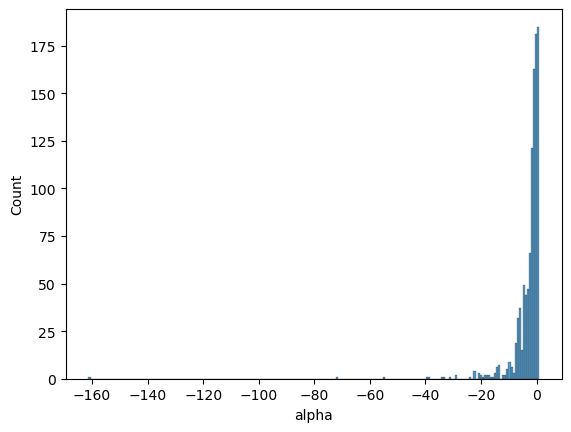

In [244]:
sns.histplot(dnds_df['alpha'])

(-10.0, 2.0)

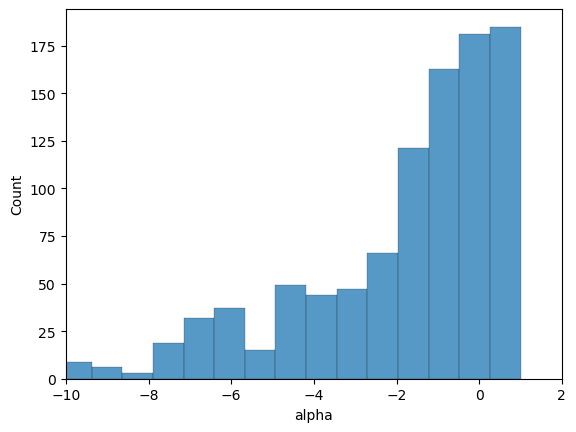

In [245]:
sns.histplot(dnds_df['alpha'])

plt.xlim([-10, 2])

<Axes: xlabel='alpha', ylabel='Count'>

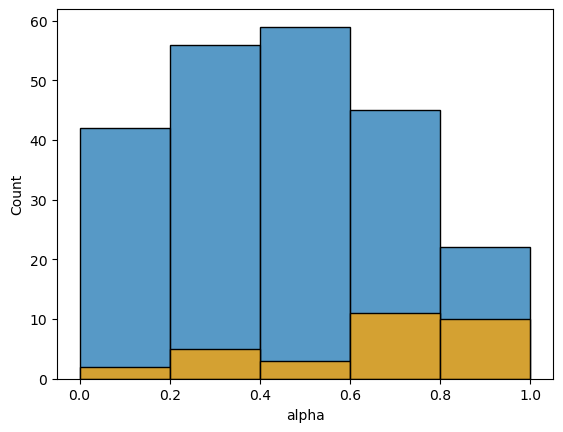

In [246]:
bins = np.arange(0, 1.1, 0.2)
sns.histplot(dnds_df[(dnds_df['alpha']>0) & (dnds_df['linkage']=='autosome')]['alpha'],
            bins = bins)
sns.histplot(dnds_df[(dnds_df['alpha']>0) & (dnds_df['linkage']=='X')]['alpha'],
            color='orange',
            bins = bins)

<Axes: xlabel='alpha', ylabel='Proportion'>

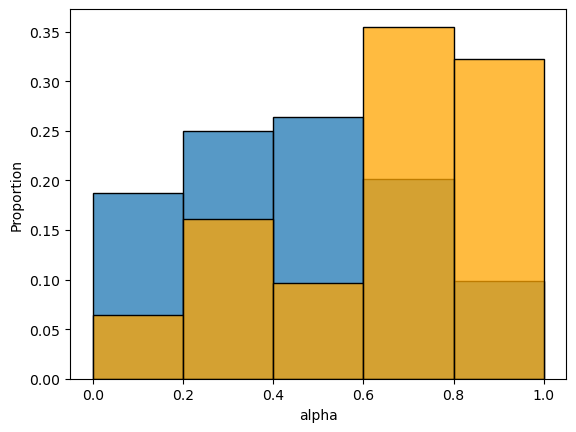

In [247]:
bins = np.arange(0, 1.1, 0.2)
sns.histplot(dnds_df[(dnds_df['alpha']>0) & (dnds_df['linkage']=='autosome')]['alpha'],
            bins = bins,
            stat = 'proportion')
sns.histplot(dnds_df[(dnds_df['alpha']>0) & (dnds_df['linkage']=='X')]['alpha'],
            color='orange',
            bins = bins,
            stat = 'proportion')

(-10.0, 2.0)

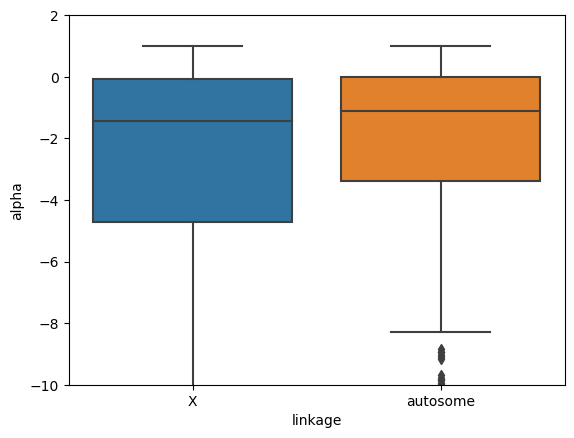

In [248]:
sns.boxplot(data = dnds_df,
            x = 'linkage',
            y = 'alpha',
            hue_order=['autosome', 'X'])

plt.ylim([-10, 2])

(-0.1, 1.1)

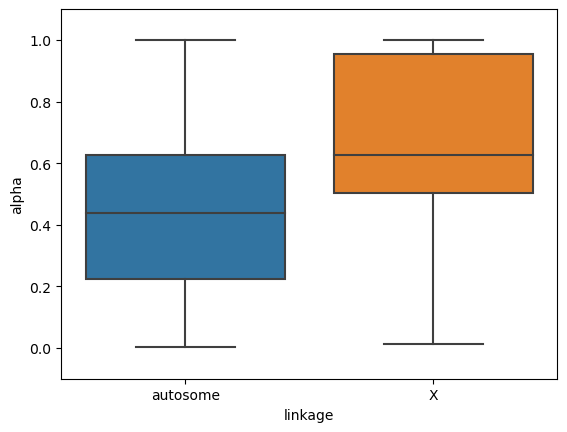

In [249]:
sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'linkage',
            y = 'alpha',
            hue_order=['autosome', 'X'])

plt.ylim([-0.1, 1.1])

(-10.0, 2.0)

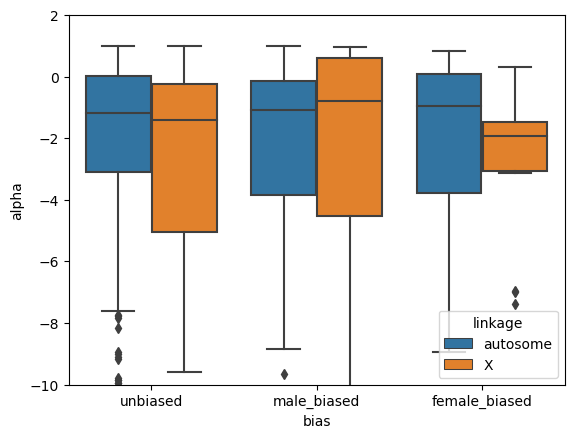

In [250]:
sns.boxplot(data = dnds_df,
            x = 'bias',
            y = 'alpha',
            hue = 'linkage',
            hue_order=['autosome', 'X'])

plt.ylim([-10, 2])

(-0.1, 1.1)

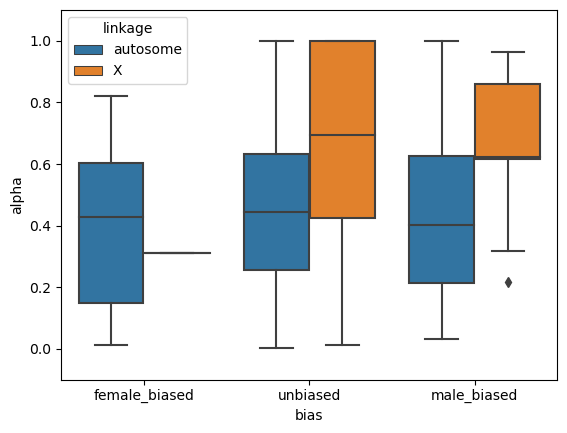

In [251]:
sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'bias',
            y = 'alpha',
            hue = 'linkage',
            hue_order=['autosome', 'X'])

plt.ylim([-0.1, 1.1])

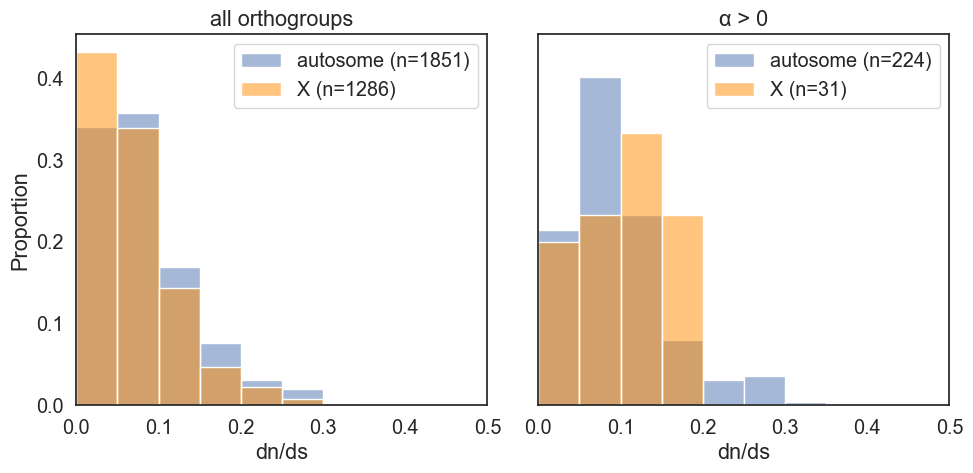

In [283]:
sns.set(font_scale=1.3, style='white')
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = [10,5], sharey=True)

dnds_bins = np.arange(0, 0.8, 0.05)

aut_df_og = dnds_og[dnds_og['linkage']=='autosome']
x_df_og = dnds_og[dnds_og['linkage']=='X']
aut_df = dnds_df[dnds_df['linkage']=='autosome']
x_df = dnds_df[dnds_df['linkage']=='X']

dnds_all = axs[0]
dnds_mckr = axs[1]

sns.histplot(aut_df_og['0/4_dxy'],
            ax = dnds_all,
            stat = 'proportion',
            bins = dnds_bins,
            label = 'autosome (n=1851)',
            alpha = 0.5)

sns.histplot(x_df_og['0/4_dxy'],
            ax = dnds_all,
            stat = 'proportion',
            bins = dnds_bins,
            color = 'darkorange',
            label = 'X (n=1286)',
            alpha = 0.5)

dnds_all.set_xlim([0,0.5])
dnds_all.set_title('all orthogroups')
dnds_all.set_xlabel('dn/ds')
dnds_all.legend()

sns.histplot(aut_df[aut_df['alpha']>0]['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            label = 'autosome (n=224)',
            alpha = 0.5)

sns.histplot(x_df[x_df['alpha']>0]['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            color = 'darkorange',
            label = 'X (n=31)',
            alpha = 0.5)

dnds_mckr.set_xlim([0,0.5])
dnds_mckr.legend()
dnds_mckr.set_xlabel('dn/ds')
dnds_mckr.set_title('α > 0')

plt.tight_layout()
plt.savefig('dnds_pair.svg', format = 'svg')

In [271]:
ut_df_og

,index,transcript,0_dxy,4_dxy,0/4_dxy,gene,chrom,linkage
0,0,g15535_t1_4,0.007225,0.175926,0.041071,g15535,OX359248,autosome
1,2,g15535_t2_4,0.002252,0.168478,0.013368,g15535,OX359248,autosome
5,9,g15257_t1_4,0.005658,0.379310,0.014916,g15257,OX359248,autosome
11,23,g12514_t1_12,0.019324,0.119048,0.162319,g12514,OX359247,autosome
12,24,g15526_t2_4,0.013393,0.432143,0.030992,g15526,OX359248,autosome
...,...,...,...,...,...,...,...,...
3133,6966,g12490_t1_12,0.080882,0.460674,0.175574,g12490,OX359247,autosome
3135,6968,g15485_t1_4,0.012012,0.401235,0.029938,g15485,OX359248,autosome
3136,6969,g15591_t1_4,0.049383,0.516129,0.095679,g15591,OX359248,autosome
3138,6971,g107_t1_1041,0.102459,0.666667,0.153689,g107,CAMXBY010000064,autosome


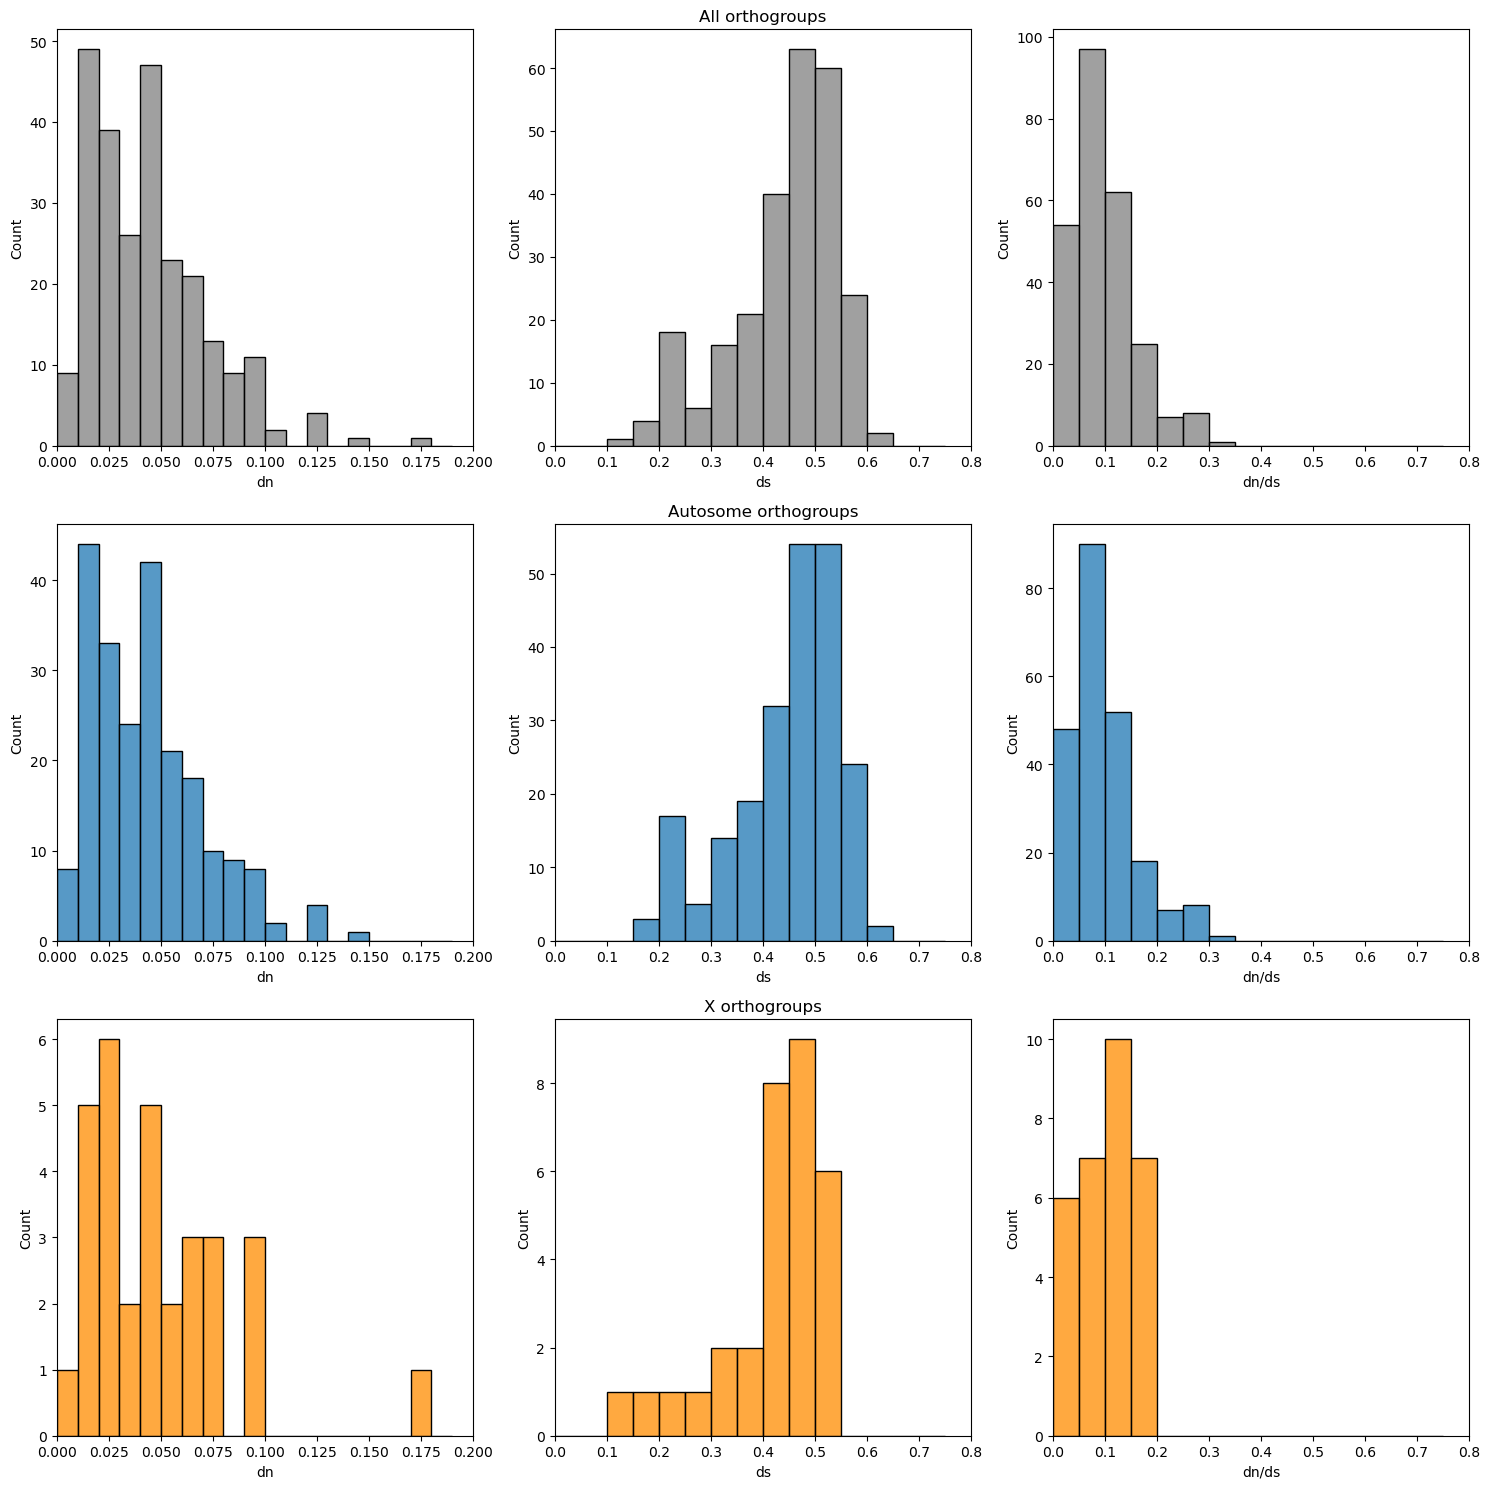

In [254]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = [15,15])

dn_bins = np.arange(0, 0.2, 0.01)
ds_bins = np.arange(0, 0.8, 0.05)
dnds_bins = np.arange(0, 0.8, 0.05)

all_df = dnds_df[dnds_df['alpha']>0]
aut_df = dnds_df[(dnds_df['linkage']=='autosome') & (dnds_df['alpha']>0)]
x_df = dnds_df[(dnds_df['linkage']=='X') & (dnds_df['alpha']>0)]

dn_all = axs[0,0]
ds_all = axs[0,1]
dnds_all = axs[0,2]
dn_aut = axs[1,0]
ds_aut = axs[1,1]
dnds_aut = axs[1,2]
dn_x = axs[2,0]
ds_x = axs[2,1]
dnds_x = axs[2,2]

### ALL
sns.histplot(all_df['0_dxy'],
            ax = dn_all,
            bins = dn_bins,
            color = 'grey')
dn_all.set_xlabel('dn')
dn_all.set_xlim([0,0.2])

sns.histplot(all_df['4_dxy'],
            ax = ds_all,
            bins = ds_bins,
            color = 'grey')
ds_all.set_xlabel('ds')
ds_all.set_title('All orthogroups', loc='center')
ds_all.set_xlim([0,0.8])

sns.histplot(all_df['0/4_dxy'],
            ax = dnds_all,
            bins = dnds_bins,
            color = 'grey')
dnds_all.set_xlabel('dn/ds')
dnds_all.set_xlim([0,0.8])

### AUTOSOME

sns.histplot(aut_df['0_dxy'],
            ax = dn_aut,
            bins = dn_bins)
dn_aut.set_xlabel('dn')
dn_aut.set_xlim([0,0.2])

sns.histplot(aut_df['4_dxy'],
            ax = ds_aut,
            bins = ds_bins)
ds_aut.set_xlabel('ds')
ds_aut.set_title('Autosome orthogroups', loc='center')
ds_aut.set_xlim([0,0.8])

sns.histplot(aut_df['0/4_dxy'],
            ax = dnds_aut,
            bins = dnds_bins)
dnds_aut.set_xlabel('dn/ds')
dnds_aut.set_xlim([0,0.8])

### X

sns.histplot(x_df['0_dxy'],
            ax = dn_x,
            bins = dn_bins,
            color = 'darkorange')
dn_x.set_xlabel('dn')
dn_x.set_xlim([0,0.2])

sns.histplot(x_df['4_dxy'],
            ax = ds_x,
            bins = ds_bins,
            color = 'darkorange')
ds_x.set_xlabel('ds')
ds_x.set_title('X orthogroups', loc='center')
ds_x.set_xlim([0,0.8])

sns.histplot(x_df['0/4_dxy'],
            ax = dnds_x,
            bins = dnds_bins,
            color = 'darkorange')

dnds_x.set_xlabel('dn/ds')
dnds_x.set_xlim([0,0.8])

plt.tight_layout()

In [255]:
x_df.shape[0]

31

Text(0.5, 1.0, 'α > 0')

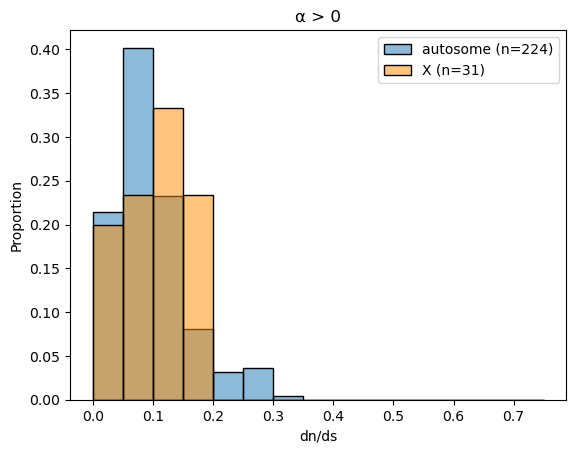

In [256]:
sns.histplot(aut_df['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            label = 'autosome (n=224)',
            alpha = 0.5)

sns.histplot(x_df['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            color = 'darkorange',
            label = 'X (n=31)',
            alpha = 0.5)

plt.legend()
plt.xlabel('dn/ds')
plt.title('α > 0')

array([<Axes: >, <Axes: >], dtype=object)

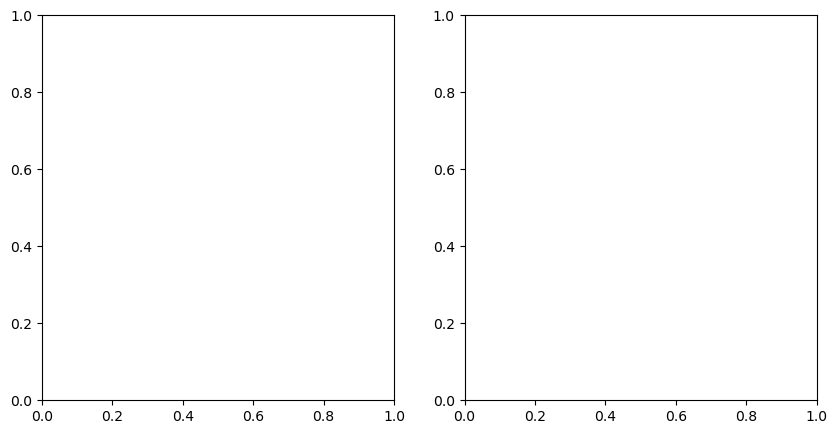

In [257]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = [10,5])
axs

Text(0.5, 1.0, 'α > 0')

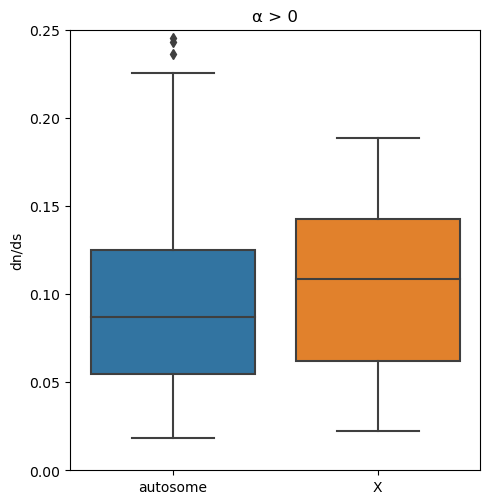

In [258]:
fig, axs = plt.subplots(figsize = [5,5])

sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'linkage',
            y = '0/4_dxy')

axs.set_ylabel('dn/ds')
axs.set_xlabel('')
axs.set_ylim([0, 0.25]) 
plt.tight_layout()
plt.title('α > 0')

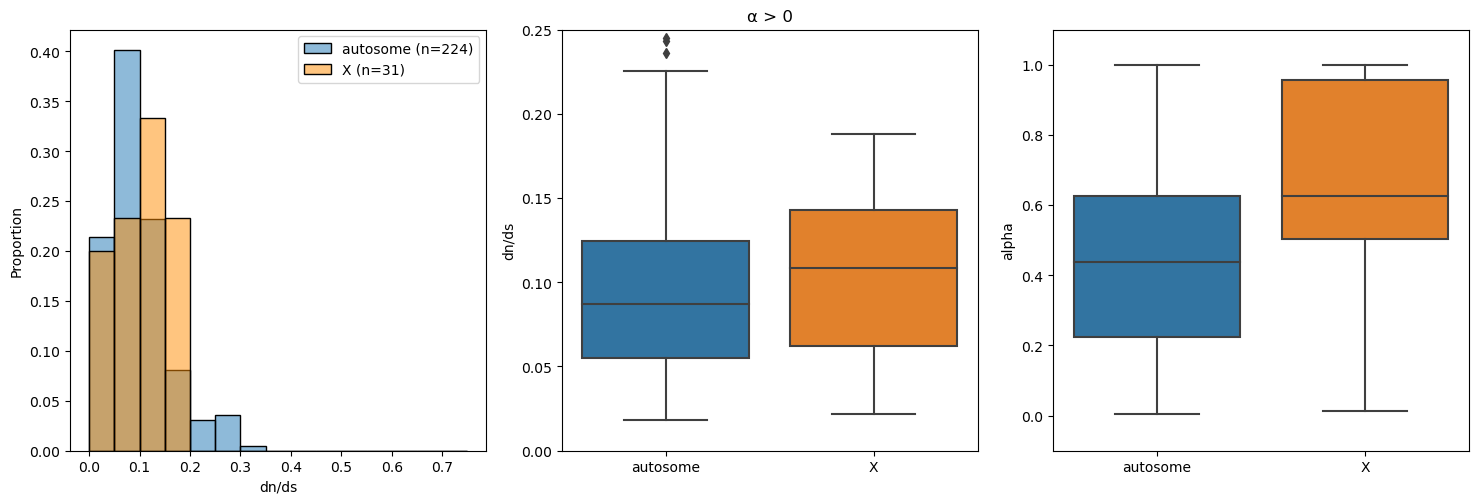

In [259]:
fig, axs = plt.subplots(ncols = 3, figsize = [15,5])

distax = axs[0] 
boxax = axs[1]
biasax = axs[2]

sns.histplot(aut_df['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            label = 'autosome (n=224)',
            alpha = 0.5,
            ax = distax)

sns.histplot(x_df['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            color = 'darkorange',
            label = 'X (n=31)',
            alpha = 0.5,
            ax = distax)

distax.set_xlabel('dn/ds')
distax.legend()

sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'linkage',
            y = '0/4_dxy',
            ax = boxax)

boxax.set_ylabel('dn/ds')
boxax.set_xlabel('')
boxax.set_ylim([0, 0.25]) 

plt.tight_layout()
boxax.set_title('α > 0')

sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'linkage',
            y = 'alpha',
            hue_order=['autosome', 'X'],
            ax = biasax)

biasax.set_xlabel('')
biasax.set_ylim([-0.1, 1.1])

plt.savefig('dnds_alpha.svg', format = 'svg')

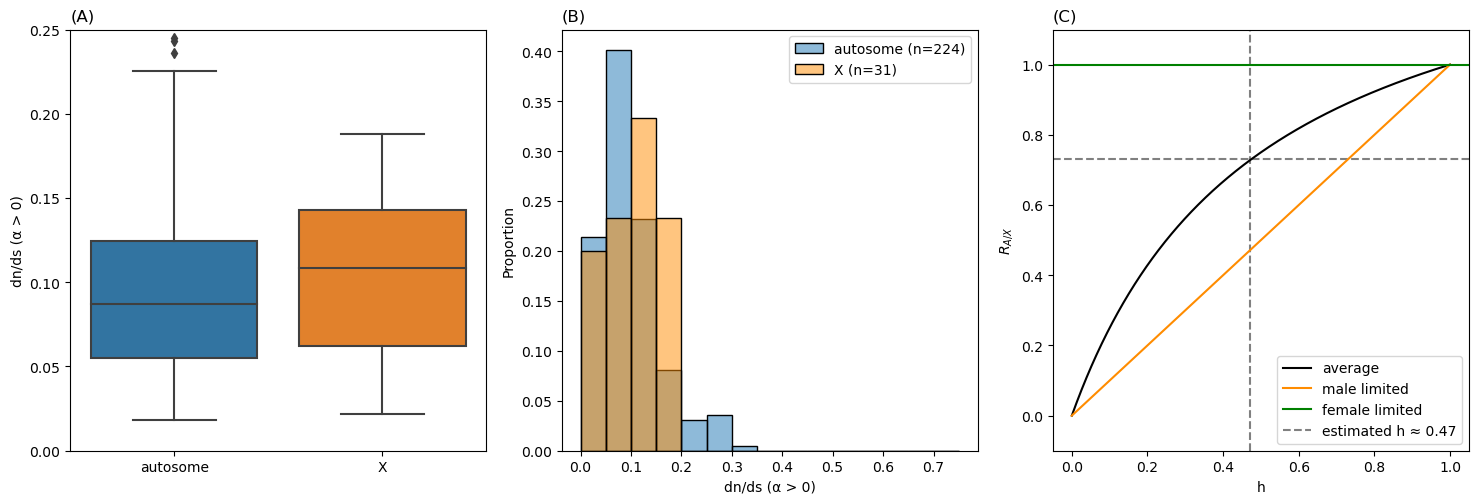

In [260]:
fig, axs = plt.subplots(ncols = 3, figsize = [15,5])

def a_to_x_sub_ratio_pge(h):
    return (3*h)/(1+(2*h))

h = np.linspace(0,1, 1000)

distax = axs[1] 
boxax = axs[0]
expax = axs[2]

sns.histplot(aut_df['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            label = 'autosome (n=224)',
            alpha = 0.5,
            ax = distax)

sns.histplot(x_df['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            color = 'darkorange',
            label = 'X (n=31)',
            alpha = 0.5,
            ax = distax)

distax.set_xlabel('dn/ds (α > 0)')
distax.legend()

sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'linkage',
            y = '0/4_dxy',
            ax = boxax)

boxax.set_ylabel('dn/ds (α > 0)')
boxax.set_xlabel('')
boxax.set_ylim([0, 0.25]) 

plt.tight_layout()
distax.set_title('(B)', loc = 'left')
boxax.set_title('(A)', loc = 'left')

RX = a_to_x_sub_ratio_pge(h)

sns.lineplot(x=h,
            y=RX,
            color='black',
            label='average',
            ax = expax)

sns.lineplot(x=h,
            y=h,
            color = 'darkorange',
            label='male limited',
            ax = expax)

expax.axhline(y=1, color='green', label = 'female limited')
expax.set_xlabel('h')
expax.set_ylabel('$R_{A/X}$')
expax.axhline(0.73, linestyle='--', zorder=0, color='grey', label = 'estimated h ≈ 0.47')
expax.axvline(0.47, linestyle='--', zorder=0, color='grey')
expax.legend(loc='lower right')
expax.set_title('(C)', loc = 'left')
expax.set_ylim([-0.1, 1.1])

plt.savefig('dnds_exp.svg', format = 'svg')

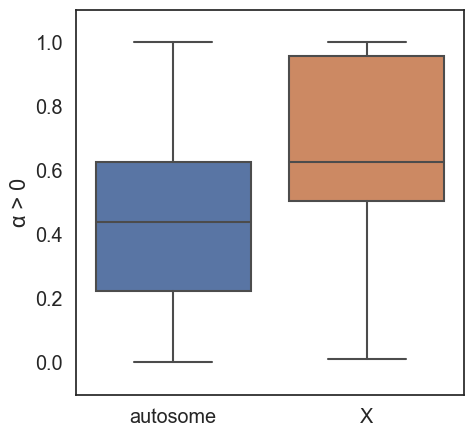

In [294]:
sns.set(font_scale=1.3, style='white')
fig, axs = plt.subplots(figsize = [5,5])
boxax = axs

sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'linkage',
            y = 'alpha',
            hue_order=['autosome', 'X'],
            ax = boxax)

boxax.set_xlabel('')
boxax.set_ylabel('α > 0')
boxax.set_ylim([-0.1, 1.1])

plt.savefig('alpha>0.svg', format = 'svg')

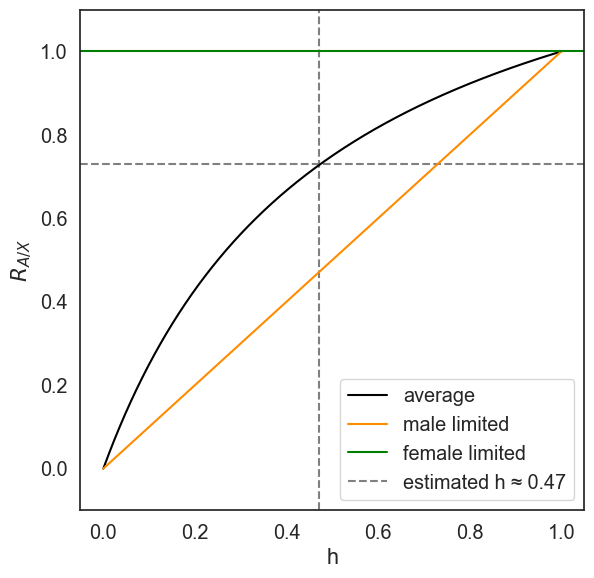

In [288]:
sns.set(font_scale=1.3, style='white')
fig, axs = plt.subplots(figsize = [6.5,6])
expax = axs

def a_to_x_sub_ratio_pge(h):
    return (3*h)/(1+(2*h))

h = np.linspace(0,1, 1000)

RX = a_to_x_sub_ratio_pge(h)

sns.lineplot(x=h,
            y=RX,
            color='black',
            label='average',
            ax = expax)

sns.lineplot(x=h,
            y=h,
            color = 'darkorange',
            label='male limited',
            ax = expax)

expax.axhline(y=1, color='green', label = 'female limited')
expax.set_xlabel('h')
expax.set_ylabel('$R_{A/X}$')
expax.axhline(0.73, linestyle='--', zorder=0, color='grey', label = 'estimated h ≈ 0.47')
expax.axvline(0.47, linestyle='--', zorder=0, color='grey')
expax.legend(loc='lower right')
expax.set_ylim([-0.1, 1.1])

plt.savefig('RAX.svg', format = 'svg')

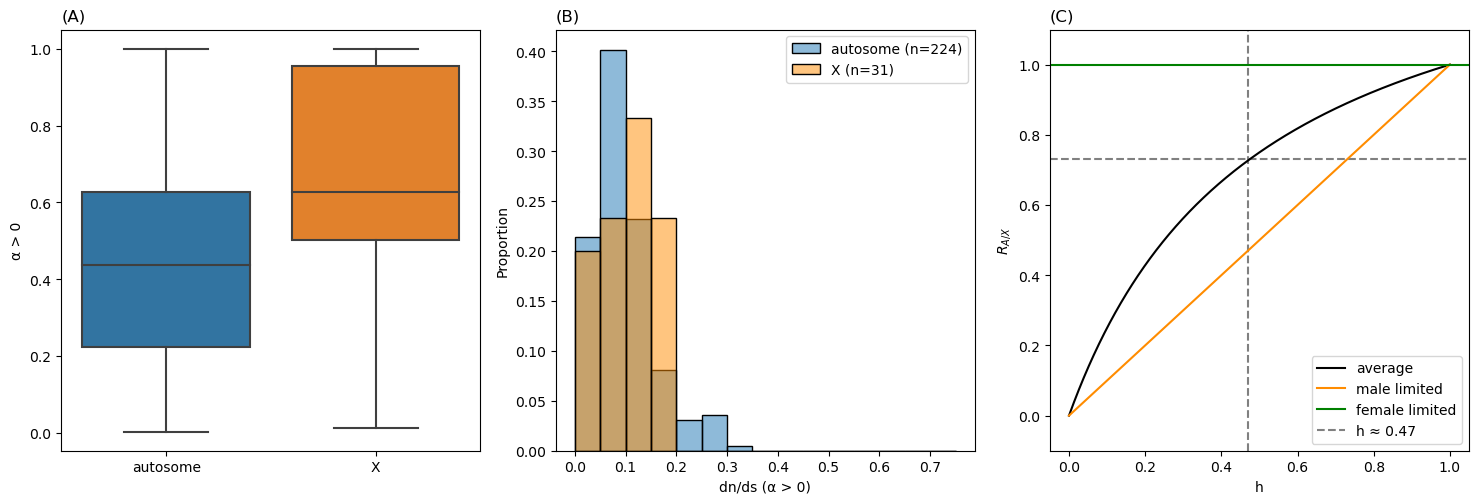

In [261]:
fig, axs = plt.subplots(ncols = 3, figsize = [15,5])

def a_to_x_sub_ratio_pge(h):
    return (3*h)/(1+(2*h))

h = np.linspace(0,1, 1000)

distax = axs[1] 
boxax = axs[0]
expax = axs[2]

sns.histplot(aut_df['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            label = 'autosome (n=224)',
            alpha = 0.5,
            ax = distax)

sns.histplot(x_df['0/4_dxy'],
            bins = dnds_bins,
            stat = 'proportion',
            color = 'darkorange',
            label = 'X (n=31)',
            alpha = 0.5,
            ax = distax)

distax.set_xlabel('dn/ds (α > 0)')
distax.legend()

sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'linkage',
            y = 'alpha',
            ax = boxax)

boxax.set_ylabel('α > 0')
boxax.set_xlabel('')
#boxax.set_ylim([0, 0.25]) 

plt.tight_layout()
distax.set_title('(B)', loc = 'left')
boxax.set_title('(A)', loc = 'left')

RX = a_to_x_sub_ratio_pge(h)

sns.lineplot(x=h,
            y=RX,
            color='black',
            label='average',
            ax = expax)

sns.lineplot(x=h,
            y=h,
            color = 'darkorange',
            label='male limited',
            ax = expax)

expax.axhline(y=1, color='green', label = 'female limited')
expax.set_xlabel('h')
expax.set_ylabel('$R_{A/X}$')
expax.axhline(0.73, linestyle='--', zorder=0, color='grey', label = 'h ≈ 0.47')
expax.axvline(0.47, linestyle='--', zorder=0, color='grey')
expax.legend(loc='lower right')
expax.set_title('(C)', loc = 'left')
expax.set_ylim([-0.1, 1.1])

plt.savefig('alpha_exp.svg', format = 'svg')

In [262]:
dnds_df[(dnds_df['linkage']=='autosome') & (dnds_df['alpha']>0)]['0_dxy'].mean()/dnds_df[(dnds_df['linkage']=='X') & (dnds_df['alpha']>0)]['0_dxy'].mean()

0.8764613840930914

In [263]:
dnds_df[(dnds_df['linkage']=='autosome') & (dnds_df['alpha']>0)]['0/4_dxy'].mean()/dnds_df[(dnds_df['linkage']=='X') & (dnds_df['alpha']>0)]['0/4_dxy'].mean()

0.7366647941112496

In [264]:
dnds_df[dnds_df['alpha']>0][['linkage']].describe()

,linkage
count,255
unique,2
top,autosome
freq,224


<Axes: xlabel='linkage', ylabel='alpha'>

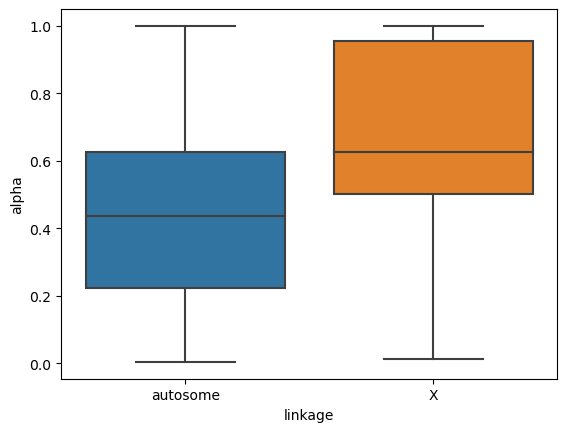

In [265]:
sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'linkage',
            y = 'alpha',
            hue_order=['autosome', 'X'])

(-10.0, 2.0)

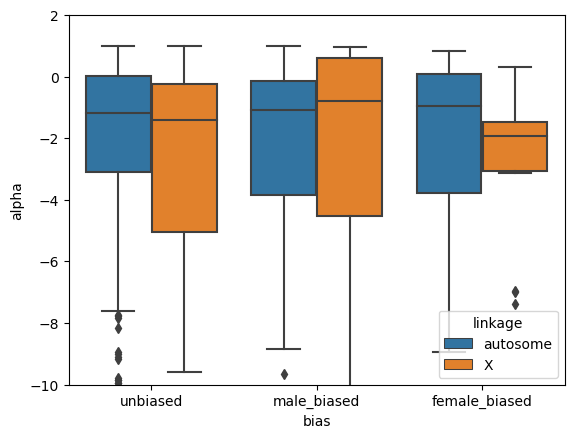

In [266]:
sns.boxplot(data = dnds_df,
            x = 'bias',
            y = 'alpha',
            hue = 'linkage',
            hue_order=['autosome', 'X'])

plt.ylim([-10, 2])

<Axes: xlabel='bias', ylabel='alpha'>

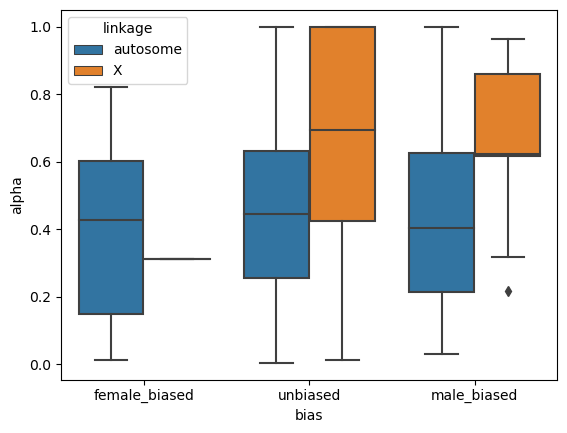

In [267]:
sns.boxplot(data = dnds_df[dnds_df['alpha']>0],
            x = 'bias',
            y = 'alpha',
            hue = 'linkage',
            hue_order=['autosome', 'X'])

In [268]:
#Decide how to label adaptive genes
#Once i have an adaptive dataset randomly resample to 

KeyboardInterrupt: 

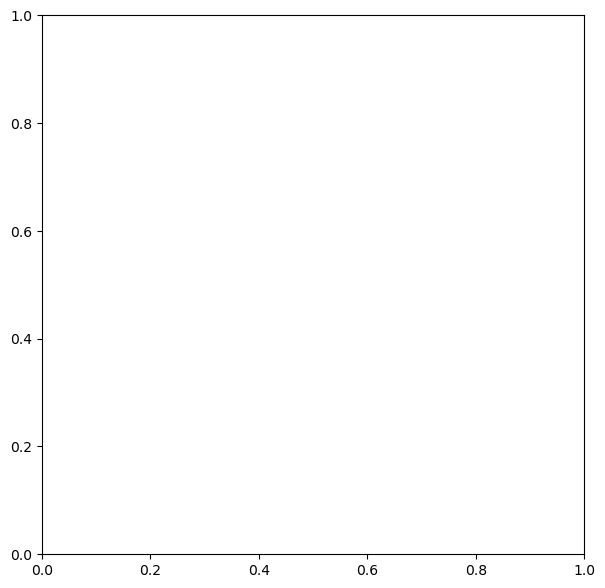

In [269]:
fig, axs = plt.subplots(figsize = [7,7])

import random
obs = dnds_df[(dnds_df['linkage']=='autosome') & (dnds_df['alpha']>0)]['0/4_dxy'].mean()/dnds_df[(dnds_df['linkage']=='X') & (dnds_df['alpha']>0)]['0/4_dxy'].mean()
n_a = dnds_df[(dnds_df['alpha']>0) & (dnds_df['linkage']=='autosome')].shape[0]
n_x = dnds_df[(dnds_df['alpha']>0) & (dnds_df['linkage']=='X')].shape[0]
values = dnds_df[dnds_df['alpha']>0]['0/4_dxy'].to_list()
results = []
for i in range(100000):
    a_mean = np.mean(random.choices(values, k=n_a))
    x_mean = np.mean(random.choices(values, k=n_x))
    results.append(a_mean/x_mean)
sns.histplot(results, color='grey', label = 'Resampled values')
mean = np.mean(results)
sd = np.std(results)
plt.axvline(obs, linestyle='--', zorder=1, color='red', label = f'Obs ({np.round((obs-mean)/sd, 3)} SDs below mean)')
plt.legend()
plt.xlabel('Mean ratio of autosome to X-linked dn/ds')

In [ ]:
fig, axs = plt.subplots(figsize = [7,7])

import random
obs = dnds_df[(dnds_df['linkage']=='autosome')]['0/4_dxy'].mean()/dnds_df[(dnds_df['linkage']=='X')]['0/4_dxy'].mean()
n_a = dnds_df[(dnds_df['linkage']=='autosome')].shape[0]
n_x = dnds_df[(dnds_df['linkage']=='X')].shape[0]
values = dnds_df['0/4_dxy'].to_list()
results = []
for i in range(100000):
    a_mean = np.mean(random.choices(values, k=n_a))
    x_mean = np.mean(random.choices(values, k=n_x))
    results.append(a_mean/x_mean)
sns.histplot(results, color='grey', label = 'Resampled values')
mean = np.mean(results)
sd = np.std(results)
plt.axvline(obs, linestyle='--', zorder=1, color='red', label = f'Obs ({np.round((obs-mean)/sd, 3)} SDs below mean)')
plt.legend()
plt.xlabel('Mean ratio of autosome to X-linked dn/ds (all orthogroups)')

In [ ]:
fig, axs = plt.subplots(figsize = [7,7])

import random
obs = dnds_df[(dnds_df['bias']=='unbiased')]['0/4_dxy'].mean()/dnds_df[(dnds_df['bias']=='male_biased')]['0/4_dxy'].mean()
n_a = dnds_df[(dnds_df['bias']=='unbiased')].shape[0]
n_x = dnds_df[(dnds_df['bias']=='male_biased')].shape[0]
values = dnds_df['0/4_dxy'].to_list()
results = []
for i in range(100000):
    a_mean = np.mean(random.choices(values, k=n_a))
    x_mean = np.mean(random.choices(values, k=n_x))
    results.append(a_mean/x_mean)
sns.histplot(results, color='grey', label = 'Resampled values')
mean = np.mean(results)
sd = np.std(results)
plt.axvline(obs, linestyle='--', zorder=1, color='red', label = f'Obs ({np.round((obs-mean)/sd, 3)} SDs below mean)')
plt.legend()
plt.xlabel('Mean ratio of unbiased to male-biased dn/ds (all orthogroups)')

In [ ]:
fig, axs = plt.subplots(figsize = [7,7])

import random
obs = dnds_df[(dnds_df['bias']=='female_biased')]['0/4_dxy'].mean()/dnds_df[(dnds_df['bias']=='male_biased')]['0/4_dxy'].mean()
n_a = dnds_df[(dnds_df['bias']=='female_biased')].shape[0]
n_x = dnds_df[(dnds_df['bias']=='male_biased')].shape[0]
values = dnds_df['0/4_dxy'].to_list()
results = []
for i in range(100000):
    a_mean = np.mean(random.choices(values, k=n_a))
    x_mean = np.mean(random.choices(values, k=n_x))
    results.append(a_mean/x_mean)
sns.histplot(results, color='grey', label = 'Resampled values')
mean = np.mean(results)
sd = np.std(results)
plt.axvline(obs, linestyle='--', zorder=1, color='red', label = f'Obs ({np.round((obs-mean)/sd, 3)} SDs below mean)')
plt.legend()
plt.xlabel('Mean ratio of unbiased to male-biased dn/ds (all orthogroups)')

In [ ]:
dxy = dnds_df['4_dxy'].mean()
pi = dnds_df['4D_pi'].mean()
da = dxy - pi
fst = (dxy - pi) / (dxy + pi)
fst

In [ ]:
pi